In [2]:
!wget "https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0"

--2021-01-30 14:35:15--  https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa [following]
--2021-01-30 14:35:15--  https://www.dropbox.com/sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c8f02dc8fe12bd1d27bc40ac0.dl.dropboxusercontent.com/zip_download_get/ArZ9HLSTeXdnEh1ytsQkYpXeSC0seAGI9_3hsX_T_G9DzvbYgoOWez9-Nn1Oxs1yq4E6dg4i1mpIpYKZzdhy6hH-9qnH5Pa3n6f-Z1mF_QKelg [following]
--2021-01-30 14:35:16--  https://uc7c8f02dc8fe12bd1d27bc40ac0.dl.dropboxusercontent.com/zip_download_get/ArZ9HLSTeXdnEh1ytsQkYpXeSC0seAGI9_3hsX_T_G9DzvbYgoOWez9-Nn1Oxs1yq4E6dg4i1mpIpY

In [4]:
!unzip AAB-193KAr7qhFrwbwBENjPNa?dl=0 -d images/

Archive:  AAB-193KAr7qhFrwbwBENjPNa?dl=0
mapname:  conversion of  failed
   creating: images/cats/
   creating: images/dogs/
   creating: images/humans/
   creating: images/horses/
 extracting: images/dogs/dog.3.jpg   
 extracting: images/cats/cat.3.jpg   
 extracting: images/dogs/dog.9.jpg   
 extracting: images/cats/cat.6.jpg   
 extracting: images/dogs/dog.4.jpg   
 extracting: images/cats/cat.8.jpg   
 extracting: images/dogs/dog.5.jpg   
 extracting: images/cats/cat.7.jpg   
 extracting: images/dogs/dog.2.jpg   
 extracting: images/dogs/dog.8.jpg   
 extracting: images/cats/cat.5.jpg   
 extracting: images/dogs/dog.7.jpg   
 extracting: images/cats/cat.2.jpg   
 extracting: images/dogs/dog.1.jpg   
 extracting: images/cats/cat.4.jpg   
 extracting: images/cats/cat.1.jpg   
 extracting: images/dogs/dog.6.jpg   
 extracting: images/cats/cat.9.jpg   
 extracting: images/dogs/dog.57.jpg  
 extracting: images/cats/cat.15.jpg  
 extracting: images/dogs/dog.76.jpg  
 extracting: images/c

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

In [3]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")

In [5]:
classes = ['cats', 'dogs', 'horses', 'humans']

In [6]:
for c in classes:
    if not os.path.isdir("val_images/"+ c):
        os.mkdir("val_images/"+ c)

In [7]:
SPLIT = 0.9

for dirc in os.listdir("images"):

    p = "images/" + dirc
    if "." in p:
        continue
    imgs = os.listdir(p)
    split_size = int(len(imgs)*SPLIT)
    files_to_move = imgs[split_size:]
    print(files_to_move)

    for f in files_to_move:
        src =  os.path.join(p, f)
        dest = os.path.join("val_images/", dirc)

        shutil.move(src, dest)

['rider-201.jpg', 'rider-86.jpg', 'rider-123.jpg', 'rider-36.jpg', 'rider-101.jpg', 'rider-178.jpg', 'rider-147.jpg', 'rider-74.jpg', 'rider-33.jpg', 'rider-174.jpg', 'rider-172.jpg', 'rider-29.jpg', 'rider-6.jpg', 'rider-179.jpg', 'rider-170.jpg', 'rider-72.jpg', 'rider-105.jpg', 'rider-34.jpg', 'rider-150.jpg', 'rider-9.jpg', 'rider-42.jpg']
['dog.114.jpg', 'dog.151.jpg', 'dog.168.jpg', 'dog.140.jpg', 'dog.133.jpg', 'dog.117.jpg', 'dog.141.jpg', 'dog.130.jpg', 'dog.110.jpg', 'dog.44.jpg', 'dog.71.jpg', 'dog.148.jpg', 'dog.192.jpg', 'dog.92.jpg', 'dog.184.jpg', 'dog.43.jpg', 'dog.45.jpg', 'dog.181.jpg', 'dog.10.jpg', 'dog.113.jpg', 'dog.137.jpg']
['cat.47.jpg', 'cat.125.jpg', 'cat.87.jpg', 'cat.131.jpg', 'cat.65.jpg', 'cat.74.jpg', 'cat.58.jpg', 'cat.159.jpg', 'cat.2.jpg', 'cat.156.jpg', 'cat.153.jpg', 'cat.24.jpg', 'cat.119.jpg', 'cat.188.jpg', 'cat.133.jpg', 'cat.141.jpg', 'cat.194.jpg', 'cat.92.jpg', 'cat.77.jpg', 'cat.162.jpg', 'cat.23.jpg']
['horse-136.jpg', 'horse-4.jpg', 'horse

In [8]:
for dirc in os.listdir("images/"):
    p = "images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

humans 181
dogs 181
cats 181
horses 181


In [9]:
for dirc in os.listdir("val_images/"):
    p = "val_images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

humans 21
dogs 21
cats 21
horses 21


# CNN MODEL

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [11]:
model = Sequential()
model.add( Conv2D(filters=32,kernel_size=(3,3), strides=(1,1), activation='relu', input_shape= (50,50,3)) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D(filters=64,kernel_size=(3,3),activation='relu' ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

# model.add( Conv2D(filters=128,kernel_size=(3,3),activation='relu' ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )


model.add( Flatten() )
model.add( Dense(units = 100, activation='relu') )
model.add( Dropout(0.3) )
model.add( Dense(units = 4, activation='softmax' ) )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [13]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['acc'])

# Image Augmentation

In [14]:
from keras.preprocessing import image

In [15]:
train_datagen = image.ImageDataGenerator(rotation_range=20, 
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.3,
                         horizontal_flip=True,
                        rescale=1/255.)

In [16]:
val_datagen = image.ImageDataGenerator(rescale=1/255.)

In [17]:
train_generator = train_datagen.flow_from_directory(directory='./images', target_size=(50,50))

Found 724 images belonging to 4 classes.


In [18]:
train_generator.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'humans': 3}

(32, 50, 50, 3)
(32, 4)
[0. 0. 0. 1.]


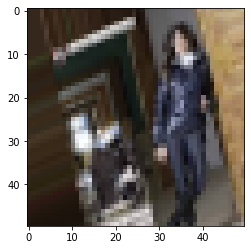

In [28]:
for X, y in train_generator:
  print(X.shape)
  print(y.shape)
  plt.imshow(X[0])
  print(y[0])
  break

In [29]:
val_generator = val_datagen.flow_from_directory(directory='./val_images', target_size=(50,50))

Found 84 images belonging to 4 classes.


## Model Training

In [31]:
his = model.fit_generator(train_generator, 
                          steps_per_epoch=724//32,
                          epochs=20, 
                          validation_data=val_generator,
                          validation_steps=81//32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
22/22 [==============================] - 4s 191ms/step - loss: 0.8765 - acc: 0.6445 - val_loss: 0.8199 - val_acc: 0.6875
Epoch 2/20
22/22 [==============================] - 4s 182ms/step - loss: 0.9168 - acc: 0.5954 - val_loss: 0.8641 - val_acc: 0.6250
Epoch 3/20
22/22 [==============================] - 4s 186ms/step - loss: 0.8546 - acc: 0.6272 - val_loss: 0.8267 - val_acc: 0.7188
Epoch 4/20
22/22 [==============================] - 4s 180ms/step - loss: 0.9090 - acc: 0.6023 - val_loss: 0.7960 - val_acc: 0.6562
Epoch 5/20
22/22 [==============================] - 4s 183ms/step - loss: 0.8963 - acc: 0.6402 - val_loss: 0.8520 - val_acc: 0.6562
Epoch 6/20
22/22 [==============================] - 4s 181ms/step - loss: 0.8238 - acc: 0.6460 - val_loss: 0.9837 - val_acc: 0.6406
Epoch 7/20
22/22 [==============================] - 4s 181ms/step - loss: 0.8566 - acc: 0.6373 - val_loss: 0.9522 - val_acc: 0.5938
Epoch 8/20
22/22 [==============================] - 4s 182ms/step - loss: 0.

In [32]:
# model.save("my_best_model.h5")


# from keras.models import load_model
# my_new_model = load_model("my_best_model.h5")

In [33]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6737536191940308, 0.7223756909370422]

In [34]:
model.evaluate_generator(val_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.8989960551261902, 0.6904761791229248]